Checking python version to ensure the code is running on Python 3

In [1]:
!python -V

Python 3.7.6


The CIFAR-100 dataset has two labels: coarse and fine, where the coarse labels correspond to 20 high level labels and the fine labels correspond to 100 low level labels.

In [2]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [3]:
train_data.shape

(50000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

Text(0.5, 1.0, 'class [11]')

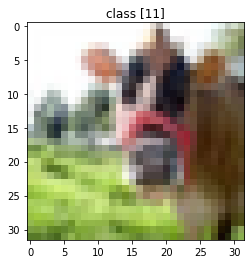

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])
plt.title("class " + str(train_labels[0]))

In [6]:
train_data = train_data.reshape((train_data.shape[0],32*32*3))
train_data.shape

(50000, 3072)

In [7]:
import numpy as np

means = np.mean(train_data, axis = 0)
stds = np.std(train_data, axis = 0)

train_data = train_data - means
train_data = train_data/stds

In [8]:
from scipy import linalg
U, S, VT = linalg.svd(train_data, full_matrices = False)

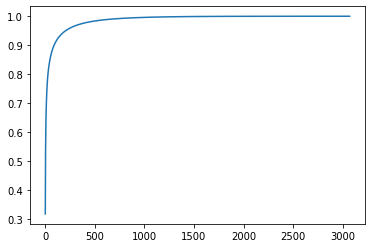

In [9]:
import matplotlib.pyplot as plt

explained_variance = pow(S,2)/(S.shape[0] - 1)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance/total_variance

plt.plot(np.cumsum(explained_variance_ratio))

In [10]:
n = np.where(np.cumsum(explained_variance_ratio) > 0.8)[0][0]

In [11]:
S = np.diag(S)
train_data = np.dot(U[0:train_data.shape[0],0:n], S[0:n, 0:n])
train_data.shape

(50000, 27)

In [12]:
test_data = test_data.reshape((test_data.shape[0], 32*32*3))

test_data = test_data - means
test_data = test_data/stds

test_data = np.dot(test_data, VT[0:n,0:32*32*3].T)    
test_data.shape

(10000, 27)

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

train_labels = train_labels.reshape((train_labels.shape[0],))
test_labels = test_labels.reshape((test_labels.shape[0],))

for n in [5,10,15,20,25,30]:
    
    model = KNeighborsClassifier(n_neighbors=n)
    accs = cross_val_score(model, train_data, train_labels, cv=10)
    acc = np.mean(accs)
    
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    correct = np.where(predictions == test_labels,1,0)
    print('k = ' ,n, ' CV_Accuracy = ', acc,' Test Accuracy = ', np.sum(correct)/len(test_labels))

k =  5  CV_Accuracy =  0.27664  Test Accuracy =  0.2767
k =  10  CV_Accuracy =  0.28506  Test Accuracy =  0.2879
k =  15  CV_Accuracy =  0.28856000000000004  Test Accuracy =  0.2905
k =  20  CV_Accuracy =  0.28758  Test Accuracy =  0.2903
k =  25  CV_Accuracy =  0.28572  Test Accuracy =  0.2889
k =  30  CV_Accuracy =  0.28458  Test Accuracy =  0.2874
Wall time: 9min 10s


In [17]:
from sklearn import metrics
import seaborn as sns

correct = np.where(predictions == test_labels,1,0)
print('k = ' ,15, ': Accuracy = ', np.sum(correct)/test_data.shape[0])

k =  15 : Accuracy =  0.2874


In [18]:
print(metrics.classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.27      0.28      0.28       500
           1       0.34      0.32      0.33       500
           2       0.45      0.44      0.44       500
           3       0.34      0.41      0.37       500
           4       0.51      0.34      0.41       500
           5       0.32      0.21      0.25       500
           6       0.38      0.29      0.33       500
           7       0.33      0.36      0.34       500
           8       0.16      0.20      0.18       500
           9       0.35      0.31      0.33       500
          10       0.31      0.62      0.41       500
          11       0.21      0.17      0.19       500
          12       0.18      0.22      0.20       500
          13       0.15      0.24      0.18       500
          14       0.47      0.11      0.18       500
          15       0.11      0.14      0.13       500
          16       0.17      0.17      0.17       500
          17       0.40    

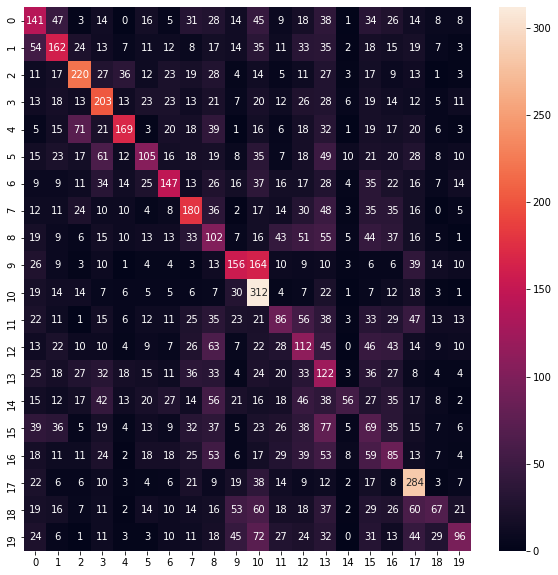

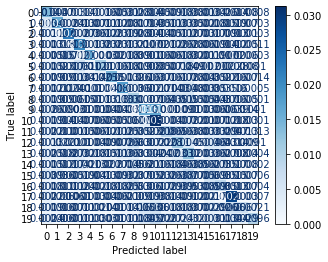

In [19]:
cm = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True,fmt='g')
print(metrics.plot_confusion_matrix(model, test_data, test_labels, cmap=plt.cm.Blues, normalize="all"))
plt.show()